In [1]:
pip install corner

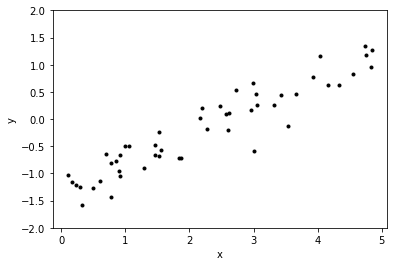

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

true_m = 0.5
true_b = -1.3
true_logs = np.log(0.3)

x = np.sort(np.random.uniform(0, 5, 50))
y = true_b + true_m * x + np.exp(true_logs) * np.random.randn(len(x))

plt.plot(x, y, ".k")
plt.ylim(-2, 2)
plt.xlabel("x")
_ = plt.ylabel("y")


In [3]:
import pymc3 as pm

with pm.Model() as model:

    # Priors P(H):
    m = pm.Uniform("m", lower=-5, upper=5)
    b = pm.Uniform("b", lower=-5, upper=5)
    logs = pm.Uniform("logs", lower=-5, upper=5)

    # Likelihood P(E|H)
    pm.Normal("obs", mu=m * x + b, sd=pm.math.exp(logs), observed=y)

    trace = pm.sample(
        draws=1000, tune=1000, chains=2, cores=2, return_inferencedata=True
    )


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [logs, b, m]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 6 seconds.


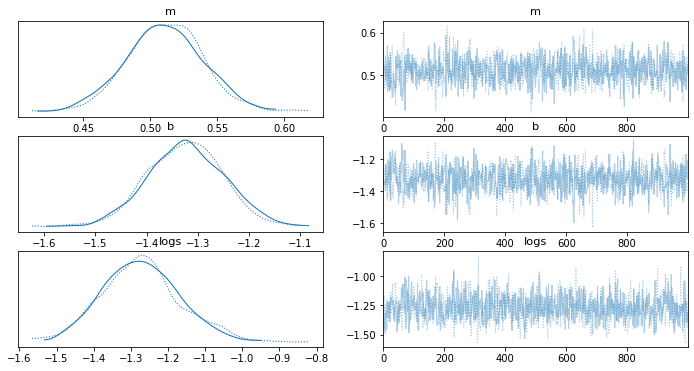

In [4]:
import arviz as az

_ = az.plot_trace(trace, var_names=["m", "b", "logs"])


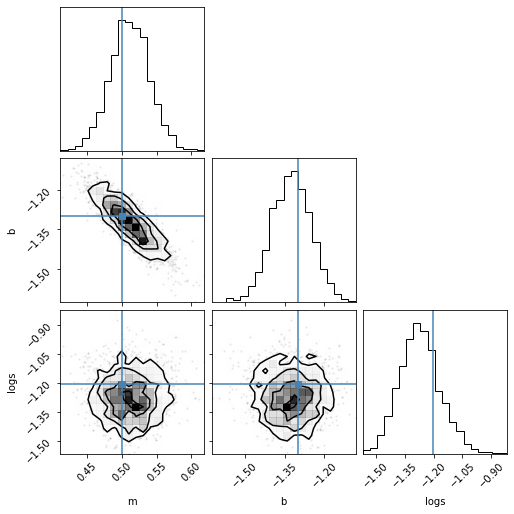

In [5]:
import corner

_ = corner.corner(
    trace,
    truths=dict(m=true_m, b=true_b, logs=true_logs),
)